# EDA - Credit Card Fraud Data

## Task 1: Data Analysis and Preprocessing

**Objective**: Prepare clean, feature-rich datasets ready for modeling by exploring the data, engineering meaningful features, and handling class imbalance.

This notebook focuses on:
- Data Cleaning (missing values, duplicates, data types)
- Exploratory Data Analysis
- Feature Engineering
- Handling Class Imbalance

**Note**: This dataset contains PCA-transformed features (V1-V28) for privacy protection. The original features have been anonymized.


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load the Data


In [26]:
# Define paths
data_dir = Path('../data')
raw_data_path = data_dir / 'raw' / 'creditcard.csv'
processed_data_path = data_dir / 'processed'

# Create processed directory if it doesn't exist
processed_data_path.mkdir(parents=True, exist_ok=True)

# Load the dataset
print("Loading credit card fraud dataset...")
df = pd.read_csv(raw_data_path)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Loading credit card fraud dataset...

Dataset loaded successfully!
Shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Initial Data Exploration


In [27]:
# Basic information about the dataset
print("=" * 120)
print("DATASET INFORMATION")
print("=" * 120)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
print(df.columns.tolist())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nDataset Info:")
df.info()


DATASET INFORMATION

Shape: 284807 rows × 31 columns

Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   C

In [28]:
# Statistical summary
print("=" * 120)
print("STATISTICAL SUMMARY")
print("=" * 120)
df.describe(include='all')


STATISTICAL SUMMARY


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data Cleaning

### 3.1 Check for Missing Values


In [29]:
# Check for missing values
print("=" * 120)
print("MISSING VALUES ANALYSIS")
print("=" * 120)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset!")

# Visualize missing values if any exist
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df, x='Column', y='Missing Percentage')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


### 3.2 Handle Missing Values

**Strategy**: 
- For numerical columns (V1-V28, Time, Amount): Use median imputation (robust to outliers)
- For Class column: Drop rows with missing values (critical target variable)
- **Justification**: 
  - Median imputation preserves the distribution of PCA-transformed features
  - Missing target values cannot be imputed and must be removed


In [30]:
# Store original shape
original_shape = df.shape
print(f"Original dataset shape: {original_shape}")

# Handle missing values based on column type
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    
    # Drop rows with missing Class (target variable) - cannot be imputed
    if df['Class'].isnull().sum() > 0:
        missing_class_count = df['Class'].isnull().sum()
        df = df.dropna(subset=['Class'])
        print(f"  - Dropped {missing_class_count} rows with missing Class (target variable)")
    
    # Numerical columns - use median imputation
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  - Filled {col} with median: {median_val:.4f}")
    
    # Verify no missing values remain
    remaining_missing = df.isnull().sum().sum()
    print(f"\n✓ Missing values handled. Remaining missing: {remaining_missing}")
else:
    print("\n✓ No missing values to handle!")


Original dataset shape: (284807, 31)

✓ No missing values to handle!


### 3.3 Remove Duplicates


In [31]:
# Check for duplicate rows
print("=" * 120)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 120)

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    duplicate_percent = (duplicate_count / len(df)) * 100
    print(f"Percentage of duplicates: {duplicate_percent:.2f}%")
    
    # Check if duplicates have different Class labels (data quality issue)
    duplicate_mask = df.duplicated(keep=False)
    if duplicate_mask.sum() > 0:
        duplicate_df = df[duplicate_mask]
        # Check for conflicting labels in duplicates
        conflicting = duplicate_df.groupby(list(df.columns.drop('Class'))).agg({
            'Class': ['nunique', 'unique']
        })
        conflicting = conflicting[conflicting[('Class', 'nunique')] > 1]
        if len(conflicting) > 0:
            print(f"\n⚠ Warning: Found {len(conflicting)} groups of duplicates with conflicting Class labels!")
            print("This indicates data quality issues. Will keep first occurrence.")
        else:
            print("\n✓ No conflicting labels in duplicate rows")
    
    # Show some duplicate examples
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
    
    # Remove duplicates (keep first occurrence)
    print(f"\nRemoving {duplicate_count} duplicate rows...")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("\n✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS

Number of duplicate rows: 1081
Percentage of duplicates: 0.38%

✓ No conflicting labels in duplicate rows

Sample duplicate rows:
      Time        V1        V2        V3        V4        V5        V6  \
32    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
113   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
220  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
221  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   

           V7        V8       

### 3.4 Correct Data Types

**Strategy**:
- Ensure `Time` is numeric (seconds elapsed)
- Ensure all PCA features (V1-V28) are float64
- Ensure `Amount` is numeric (float64 for precision)
- Ensure `Class` is integer (binary: 0 or 1)


In [32]:
# Store data types before conversion
print("=" * 120)
print("DATA TYPE CORRECTION")
print("=" * 120)
print("\nOriginal data types:")
print(df.dtypes)


DATA TYPE CORRECTION

Original data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [33]:
# Convert Time column to numeric
print("\nConverting Time column...")
if df['Time'].dtype not in ['int64', 'float64']:
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    print("  ✓ Time converted to numeric")
else:
    print("  ✓ Time is already numeric")

# Check for any conversion errors
if df['Time'].isnull().sum() > 0:
    print(f"  ⚠ Warning: {df['Time'].isnull().sum()} rows have invalid Time values")
    df = df.dropna(subset=['Time'])
    print(f"  - Dropped rows with invalid Time")
else:
    print("  ✓ Time conversion successful!")



Converting Time column...
  ✓ Time is already numeric
  ✓ Time conversion successful!


In [34]:
# Convert PCA features (V1-V28) to float64
print("\nConverting PCA features (V1-V28)...")
v_columns = [f'V{i}' for i in range(1, 29)]
for col in v_columns:
    if col in df.columns:
        if df[col].dtype != 'float64':
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
            print(f"  ✓ {col} converted to float64")
        else:
            pass  # Already correct type

print(f"  ✓ All {len(v_columns)} PCA features verified/converted")



Converting PCA features (V1-V28)...
  ✓ All 28 PCA features verified/converted


In [35]:
# Convert Amount to numeric
print("\nConverting Amount column...")
if df['Amount'].dtype not in ['int64', 'float64']:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    print("  ✓ Amount converted to numeric")
else:
    print("  ✓ Amount is already numeric")

# Check for any conversion errors
if df['Amount'].isnull().sum() > 0:
    print(f"  ⚠ Warning: {df['Amount'].isnull().sum()} rows have invalid Amount values")
    df = df.dropna(subset=['Amount'])
    print(f"  - Dropped rows with invalid Amount")
else:
    print("  ✓ Amount conversion successful!")



Converting Amount column...
  ✓ Amount is already numeric
  ✓ Amount conversion successful!


In [36]:
# Convert Class to integer (binary: 0 or 1)
print("\nConverting Class column...")
if df['Class'].dtype != 'int64':
    # Handle string representations
    df['Class'] = df['Class'].astype(str).str.strip().str.replace('"', '')
    df['Class'] = pd.to_numeric(df['Class'], errors='coerce').astype('Int64')
    print("  ✓ Class converted to integer")
    
    # Verify Class values are only 0 or 1
    invalid_class = df[~df['Class'].isin([0, 1])]
    if len(invalid_class) > 0:
        print(f"  ⚠ Warning: {len(invalid_class)} rows have invalid Class values (not 0 or 1)")
        df = df[df['Class'].isin([0, 1])]
        print(f"  - Dropped rows with invalid Class values")
    else:
        print("  ✓ All Class values are valid (0 or 1)")
else:
    # Verify Class values are only 0 or 1
    invalid_class = df[~df['Class'].isin([0, 1])]
    if len(invalid_class) > 0:
        print(f"  ⚠ Warning: {len(invalid_class)} rows have invalid Class values")
        df = df[df['Class'].isin([0, 1])]
        print(f"  - Dropped rows with invalid Class values")
    else:
        print("  ✓ Class is already integer with valid values (0 or 1)")

# Convert to int64 (non-nullable)
df['Class'] = df['Class'].astype('int64')



Converting Class column...
  ✓ Class is already integer with valid values (0 or 1)


In [37]:
print("\n" + "=" * 120)
print("FINAL DATA TYPES")
print("=" * 120)
print(df.dtypes)



FINAL DATA TYPES
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### 3.5 Data Cleaning Summary


In [38]:
# Summary of data cleaning
print("=" * 120)
print("DATA CLEANING SUMMARY")
print("=" * 120)
print(f"\nOriginal dataset shape: {original_shape}")
print(f"Final dataset shape: {df.shape}")
print(f"Rows removed: {original_shape[0] - df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print(f"\n✓ Missing values: {df.isnull().sum().sum()}")
print(f"✓ Duplicate rows: {df.duplicated().sum()}")
print(f"\n✓ Data types corrected:")
print(f"  - Time: numeric (float64)")
print(f"  - V1-V28: float64 (PCA features)")
print(f"  - Amount: numeric (float64)")
print(f"  - Class: integer (binary: 0 or 1)")

# Check Class distribution
print(f"\n✓ Class distribution:")
class_dist = df['Class'].value_counts()
print(f"  - Class 0 (Normal): {class_dist[0]:,} ({class_dist[0]/len(df)*100:.2f}%)")
print(f"  - Class 1 (Fraud): {class_dist[1]:,} ({class_dist[1]/len(df)*100:.2f}%)")

print(f"\n✓ Dataset is ready for further analysis!")
df.head()


DATA CLEANING SUMMARY

Original dataset shape: (284807, 31)
Final dataset shape: (283726, 31)
Rows removed: 1081
Columns: 31

✓ Missing values: 0
✓ Duplicate rows: 0

✓ Data types corrected:
  - Time: numeric (float64)
  - V1-V28: float64 (PCA features)
  - Amount: numeric (float64)
  - Class: integer (binary: 0 or 1)

✓ Class distribution:
  - Class 0 (Normal): 283,253 (99.83%)
  - Class 1 (Fraud): 473 (0.17%)

✓ Dataset is ready for further analysis!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 4. Save Cleaned Dataset


In [40]:
# Save cleaned dataset
cleaned_file_path = processed_data_path / 'creditcard_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"✓ Cleaned dataset saved to: {cleaned_file_path}")
print(f"  Shape: {df.shape}")
print(f"  File size: {cleaned_file_path.stat().st_size / (1024*1024):.2f} MB")


✓ Cleaned dataset saved to: ../data/processed/creditcard_cleaned.csv
  Shape: (283726, 31)
  File size: 143.29 MB


## 5. Exploratory Data Analysis (EDA)

### 5.1 Class Distribution Analysis - Quantify the Imbalance


In [41]:
# Load cleaned data if not already loaded
if 'df' not in locals() or df is None:
    cleaned_file_path = processed_data_path / 'creditcard_cleaned.csv'
    df = pd.read_csv(cleaned_file_path)

print("=" * 120)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 120)

# Class distribution
class_counts = df['Class'].value_counts().sort_index()
class_percentages = df['Class'].value_counts(normalize=True).sort_index() * 100

print(f"\nClass Distribution:")
print(f"{'Class':<10} {'Count':<15} {'Percentage':<15}")
print("-" * 60)
for idx in class_counts.index:
    print(f"{idx:<10} {class_counts[idx]:<15,} {class_percentages[idx]:<15.2f}%")

# Calculate imbalance ratio
fraud_count = class_counts.get(1, 0)
normal_count = class_counts.get(0, 0)
imbalance_ratio = normal_count / fraud_count if fraud_count > 0 else 0

print(f"\nImbalance Metrics:")
print(f"  - Normal transactions (Class 0): {normal_count:,}")
print(f"  - Fraud transactions (Class 1): {fraud_count:,}")
print(f"  - Imbalance Ratio: {imbalance_ratio:.2f}:1 (Normal:Fraud)")
print(f"  - Fraud Percentage: {class_percentages.get(1, 0):.2f}%")


CLASS DISTRIBUTION ANALYSIS

Class Distribution:
Class      Count           Percentage     
------------------------------------------------------------
0          283,253         99.83          %
1          473             0.17           %

Imbalance Metrics:
  - Normal transactions (Class 0): 283,253
  - Fraud transactions (Class 1): 473
  - Imbalance Ratio: 598.84:1 (Normal:Fraud)
  - Fraud Percentage: 0.17%


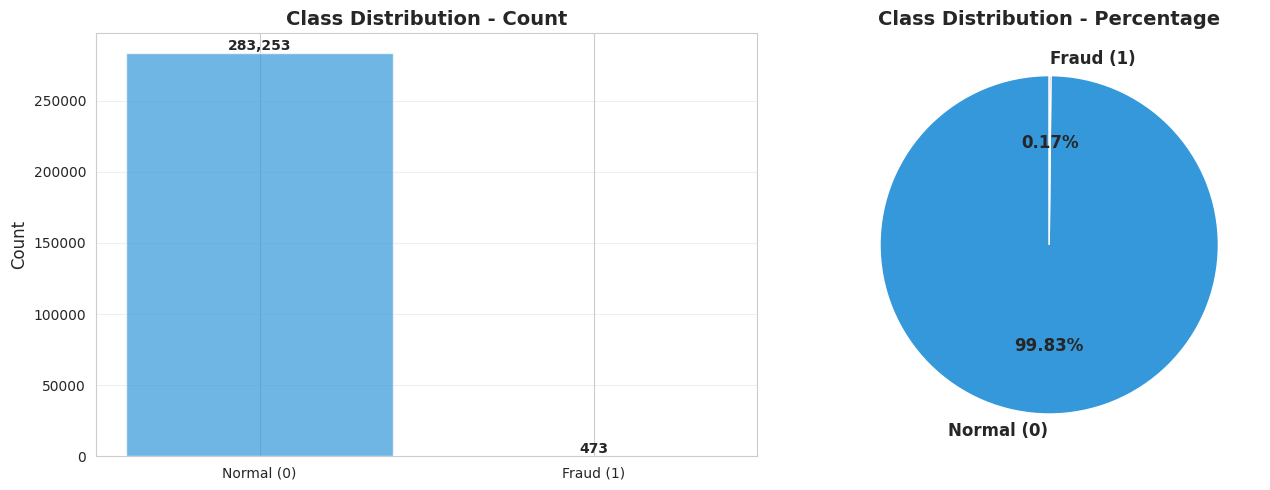


⚠ Class Imbalance Alert:
  - EXTREME imbalance detected! Ratio is 598.84:1
  - Recommendation: Use SMOTE, undersampling, or class weights


In [42]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Normal (0)', 'Fraud (1)'], [normal_count, fraud_count], 
            color=['#3498db', '#e74c3c'], alpha=0.7)
axes[0].set_title('Class Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate([normal_count, fraud_count]):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie([normal_count, fraud_count], 
            labels=['Normal (0)', 'Fraud (1)'],
            autopct='%1.2f%%',
            colors=['#3498db', '#e74c3c'],
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠ Class Imbalance Alert:")
if imbalance_ratio > 100:
    print(f"  - EXTREME imbalance detected! Ratio is {imbalance_ratio:.2f}:1")
    print(f"  - Recommendation: Use SMOTE, undersampling, or class weights")
elif imbalance_ratio > 10:
    print(f"  - Severe imbalance detected! Ratio is {imbalance_ratio:.2f}:1")
    print(f"  - Recommendation: Use techniques like SMOTE, undersampling, or class weights")
elif imbalance_ratio > 5:
    print(f"  - Moderate imbalance detected. Ratio is {imbalance_ratio:.2f}:1")
    print(f"  - Recommendation: Consider class weights or sampling techniques")
else:
    print(f"  - Relatively balanced dataset. Ratio is {imbalance_ratio:.2f}:1")


### 5.2 Univariate Analysis - Distributions of Key Variables


UNIVARIATE ANALYSIS - KEY NUMERICAL VARIABLES


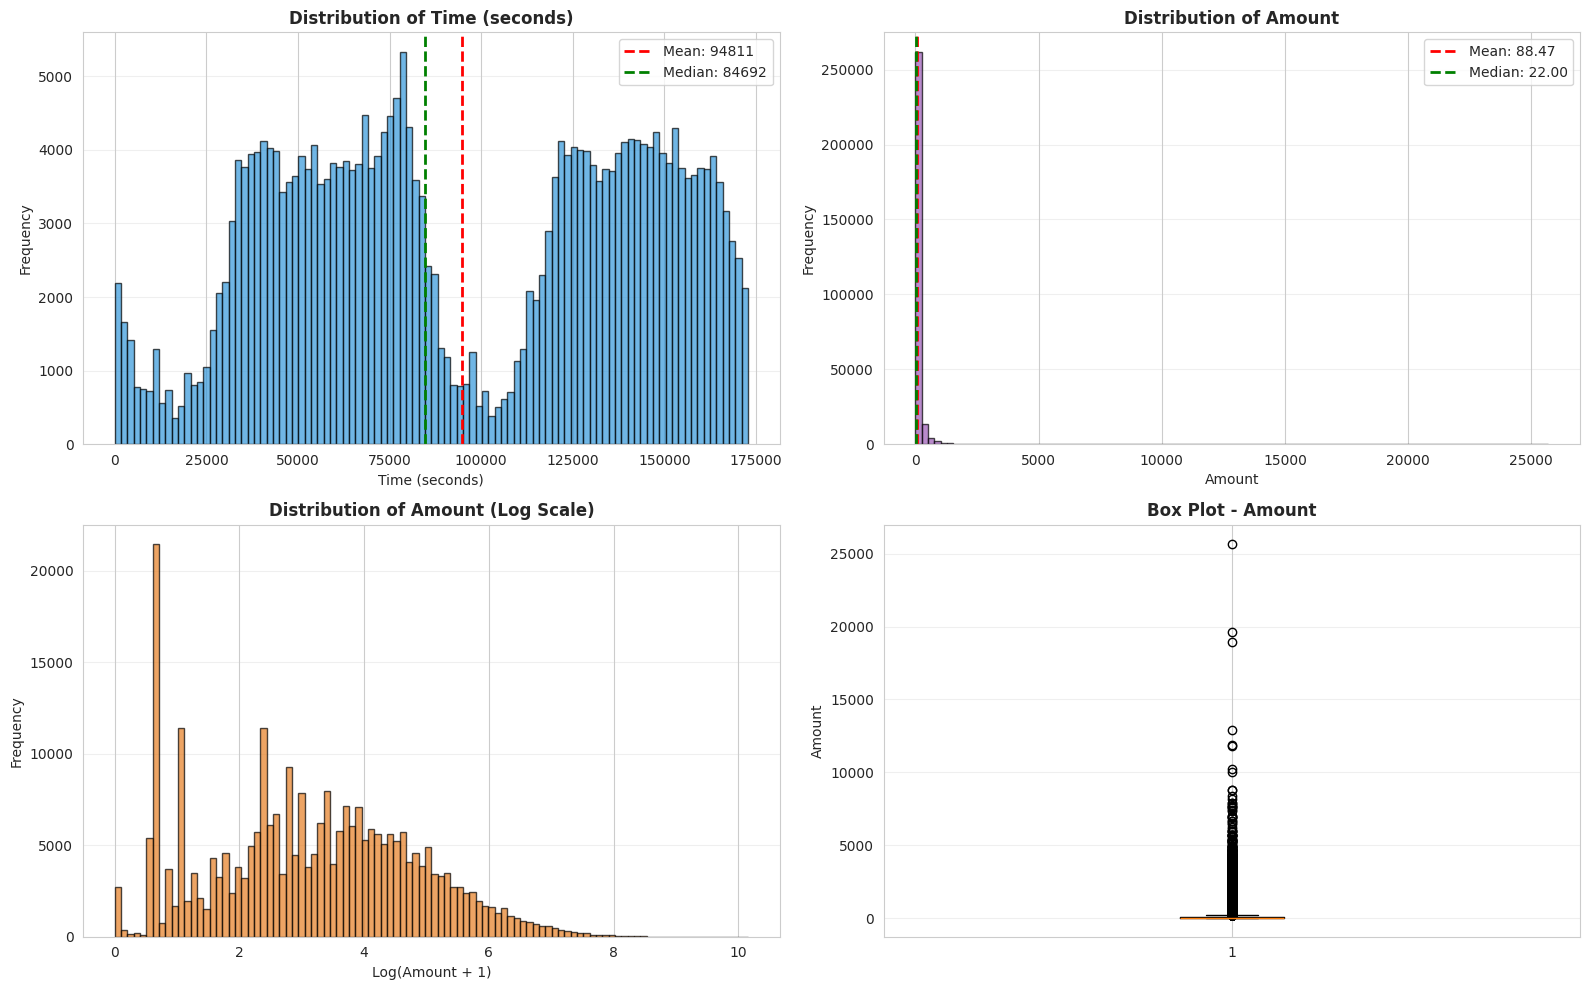


Statistical Summary of Key Variables:
                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


In [43]:
# Key numerical variables distribution
print("=" * 120)
print("UNIVARIATE ANALYSIS - KEY NUMERICAL VARIABLES")
print("=" * 120)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time distribution
axes[0, 0].hist(df['Time'], bins=100, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Time (seconds)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)
mean_time = df['Time'].mean()
median_time = df['Time'].median()
axes[0, 0].axvline(mean_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_time:.0f}')
axes[0, 0].axvline(median_time, color='green', linestyle='--', linewidth=2, label=f'Median: {median_time:.0f}')
axes[0, 0].legend()

# Amount distribution (log scale for better visualization)
axes[0, 1].hist(df['Amount'], bins=100, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Amount', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()
axes[0, 1].axvline(mean_amount, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_amount:.2f}')
axes[0, 1].axvline(median_amount, color='green', linestyle='--', linewidth=2, label=f'Median: {median_amount:.2f}')
axes[0, 1].legend()

# Amount distribution (log scale)
df['Amount_log'] = np.log1p(df['Amount'])  # log1p to handle zeros
axes[1, 0].hist(df['Amount_log'], bins=100, color='#e67e22', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Amount (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log(Amount + 1)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Box plot for Amount
axes[1, 1].boxplot(df['Amount'], vert=True)
axes[1, 1].set_title('Box Plot - Amount', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Amount', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary of Key Variables:")
print(df[['Time', 'Amount']].describe())


UNIVARIATE ANALYSIS - PCA FEATURES (V1-V28)


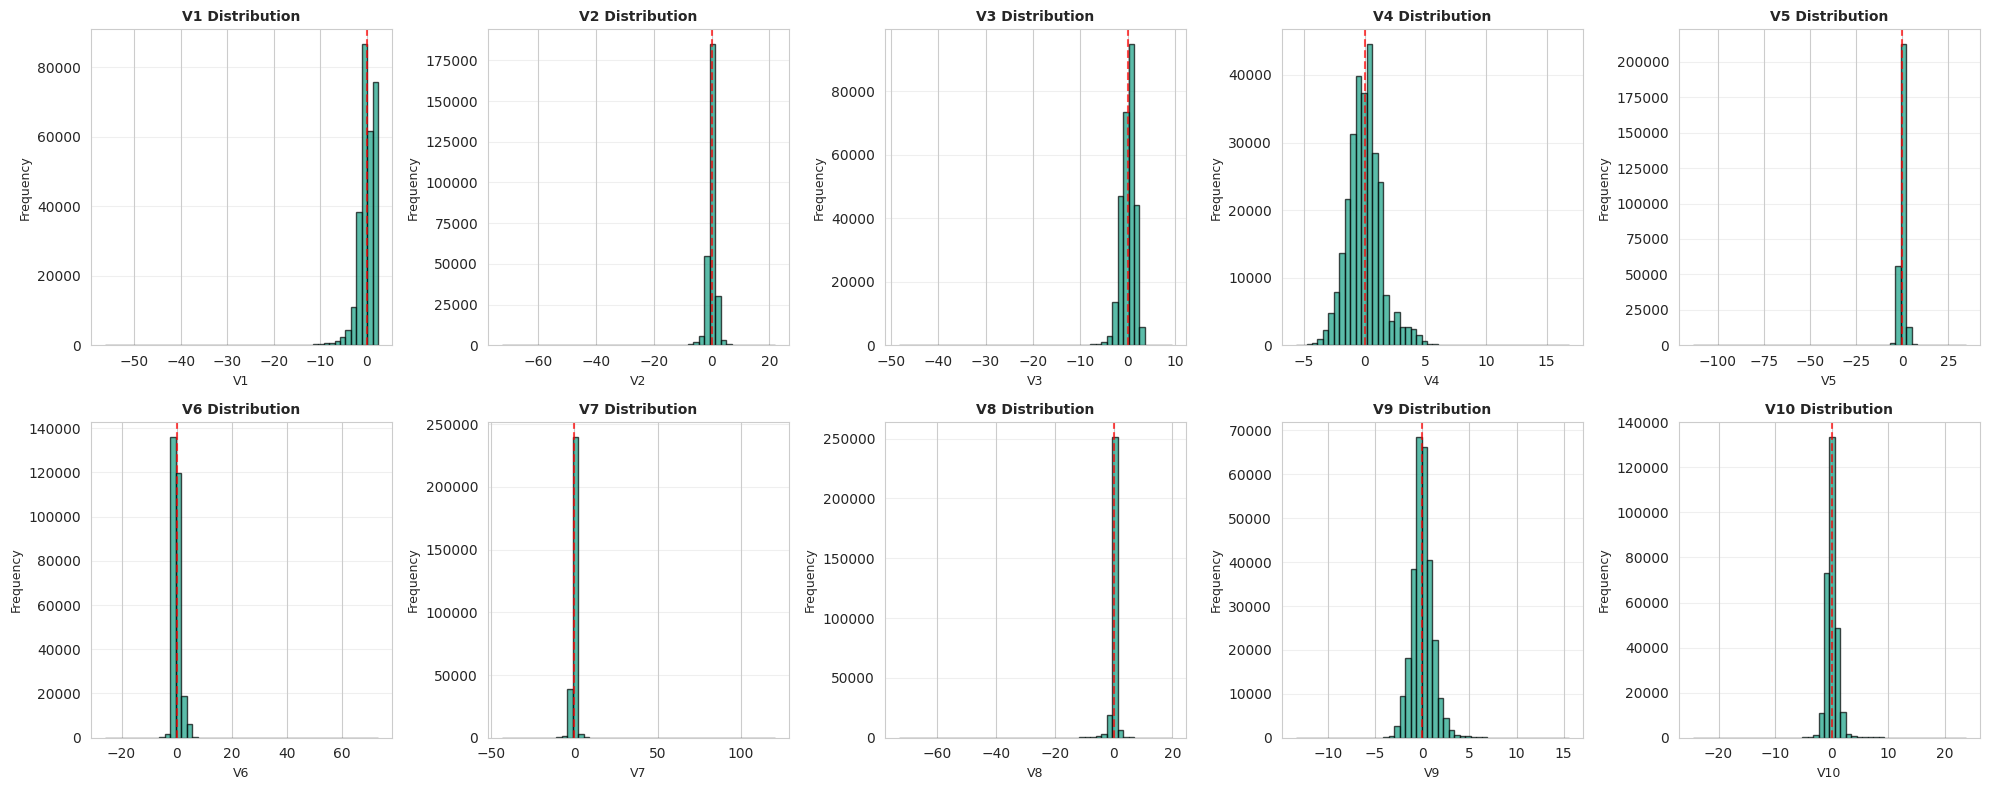


Statistical Summary of PCA Features (V1-V28):
        count      mean       std         min       25%       50%       75%  \
V1   283726.0  0.005917  1.948026  -56.407510 -0.915951  0.020384  1.316068   
V2   283726.0 -0.004135  1.646703  -72.715728 -0.600321  0.063949  0.800283   
V3   283726.0  0.001613  1.508682  -48.325589 -0.889682  0.179963  1.026960   
V4   283726.0 -0.002966  1.414184   -5.683171 -0.850134 -0.022248  0.739647   
V5   283726.0  0.001828  1.377008 -113.743307 -0.689830 -0.053468  0.612218   
V6   283726.0 -0.001139  1.331931  -26.160506 -0.769031 -0.275168  0.396792   
V7   283726.0  0.001801  1.227664  -43.557242 -0.552509  0.040859  0.570474   
V8   283726.0 -0.000854  1.179054  -73.216718 -0.208828  0.021898  0.325704   
V9   283726.0 -0.001596  1.095492  -13.434066 -0.644221 -0.052596  0.595977   
V10  283726.0 -0.001441  1.076407  -24.588262 -0.535578 -0.093237  0.453619   
V11  283726.0  0.000202  1.018720   -4.797473 -0.761649 -0.032306  0.739579   
V12  

In [44]:
# PCA Features (V1-V28) distribution analysis
print("=" * 120)
print("UNIVARIATE ANALYSIS - PCA FEATURES (V1-V28)")
print("=" * 120)

# Sample a few PCA features for visualization
v_features = [f'V{i}' for i in range(1, 29)]
sample_v_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, var in enumerate(sample_v_features):
    if idx < len(axes):
        axes[idx].hist(df[var], bins=50, color='#16a085', alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'{var} Distribution', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(var, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
        axes[idx].grid(axis='y', alpha=0.3)
        # Add mean line
        mean_val = df[var].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Statistical summary of all PCA features
print("\nStatistical Summary of PCA Features (V1-V28):")
print(df[v_features].describe().T)


### 5.3 Bivariate Analysis - Relationships Between Features and Target


BIVARIATE ANALYSIS - KEY FEATURES vs TARGET


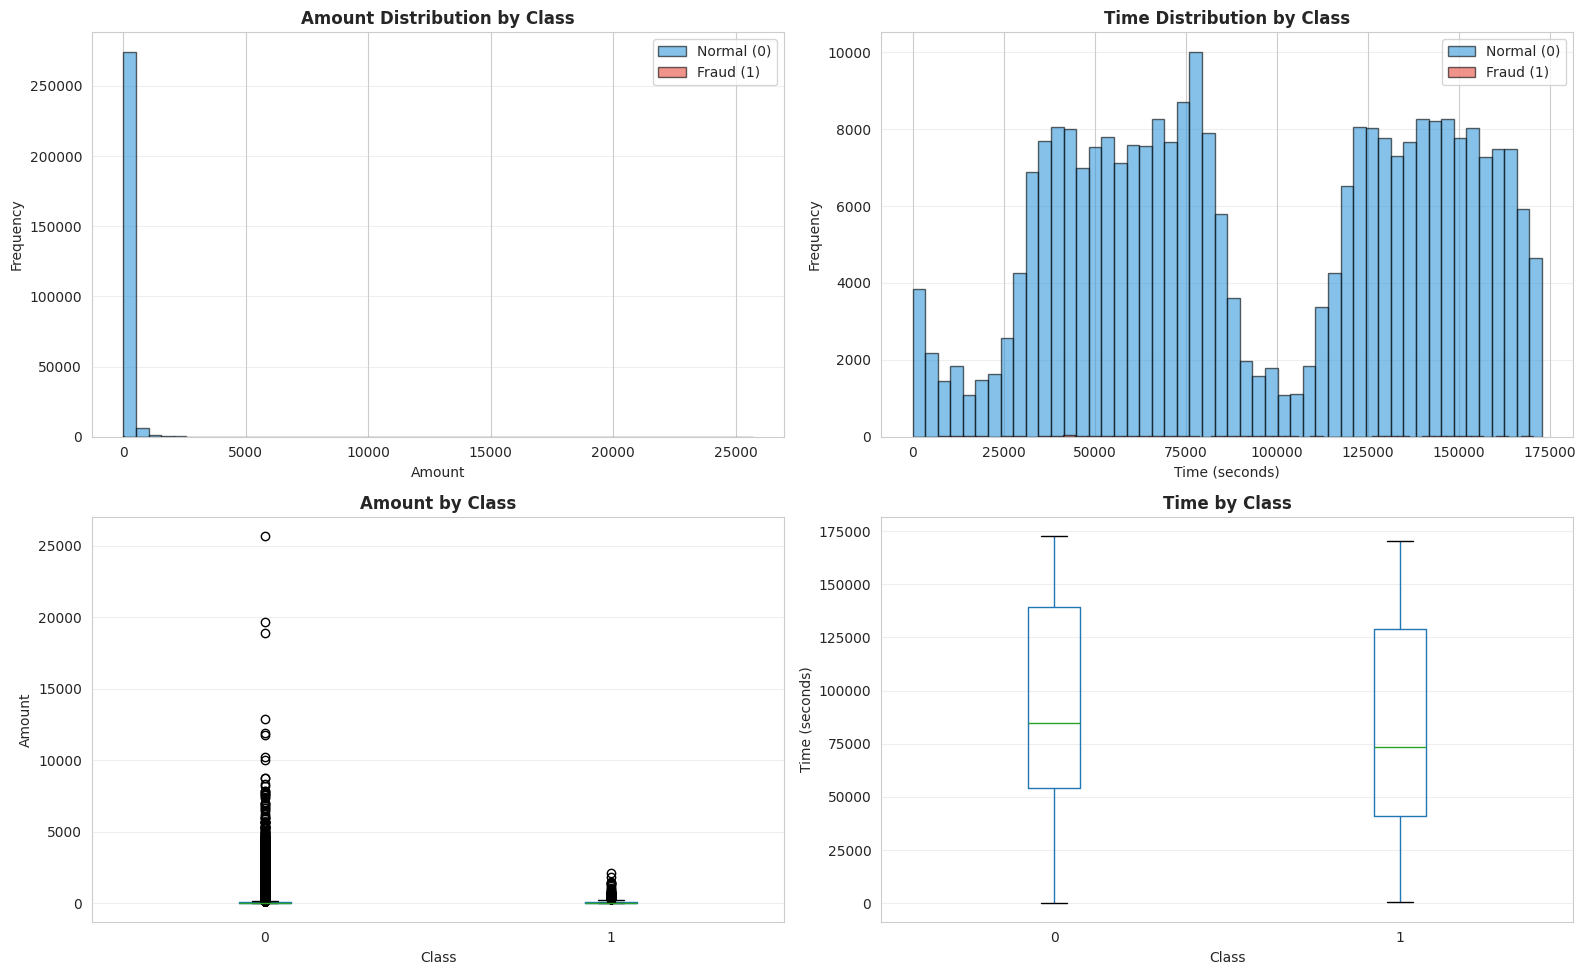


Statistical Comparison by Class:

Amount:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87

Time:
          count          mean           std    min      25%      50%  \
Class                                                                  
0      283253.0  94835.058093  47475.550607    0.0  54233.0  84711.0   
1         473.0  80450.513742  48636.179973  406.0  41203.0  73408.0   

            75%       max  
Class                      
0      139308.0  172792.0  
1      129095.0  170348.0  


In [45]:
# Key numerical features vs Target
print("=" * 120)
print("BIVARIATE ANALYSIS - KEY FEATURES vs TARGET")
print("=" * 120)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Amount by Class
fraud_amount = df[df['Class'] == 1]['Amount']
normal_amount = df[df['Class'] == 0]['Amount']

axes[0, 0].hist(normal_amount, bins=50, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
axes[0, 0].hist(fraud_amount, bins=50, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
axes[0, 0].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Time by Class
fraud_time = df[df['Class'] == 1]['Time']
normal_time = df[df['Class'] == 0]['Time']

axes[0, 1].hist(normal_time, bins=50, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
axes[0, 1].hist(fraud_time, bins=50, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
axes[0, 1].set_title('Time Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time (seconds)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Box plot: Amount by Class
df.boxplot(column='Amount', by='Class', ax=axes[1, 0], grid=False)
axes[1, 0].set_title('Amount by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Class', fontsize=10)
axes[1, 0].set_ylabel('Amount', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Box plot: Time by Class
df.boxplot(column='Time', by='Class', ax=axes[1, 1], grid=False)
axes[1, 1].set_title('Time by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Class', fontsize=10)
axes[1, 1].set_ylabel('Time (seconds)', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('', fontsize=1)  # Remove default title
plt.tight_layout()
plt.show()

# Statistical comparison
print("\nStatistical Comparison by Class:")
print("\nAmount:")
print(df.groupby('Class')['Amount'].describe())
print("\nTime:")
print(df.groupby('Class')['Time'].describe())


BIVARIATE ANALYSIS - PCA FEATURES vs TARGET


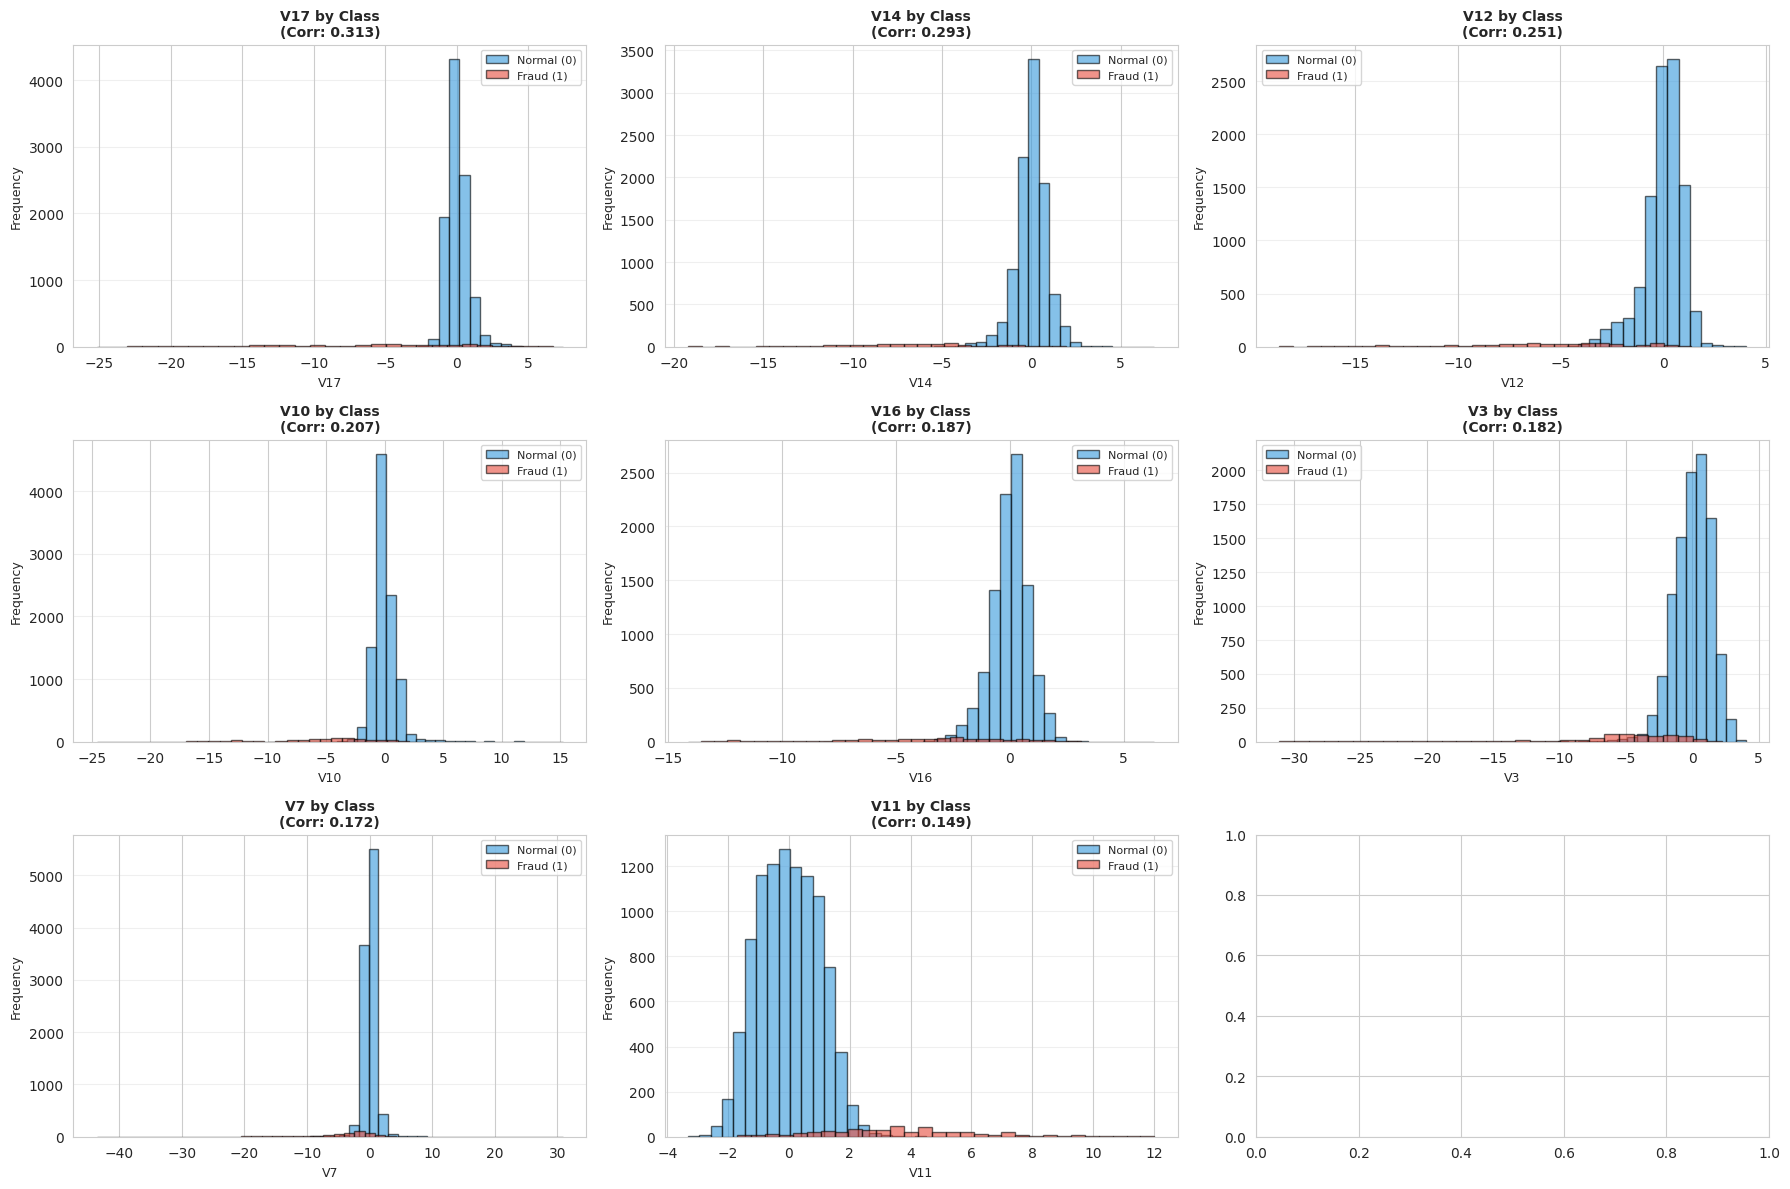


Top 10 PCA Features Correlated with Target:
  2. V17: 0.3135
  3. V14: 0.2934
  4. V12: 0.2507
  5. V10: 0.2070
  6. V16: 0.1872
  7. V3: 0.1823
  8. V7: 0.1723
  9. V11: 0.1491
  10. V4: 0.1293
  11. V18: 0.1053


In [46]:
# PCA Features vs Target - Sample analysis
print("=" * 120)
print("BIVARIATE ANALYSIS - PCA FEATURES vs TARGET")
print("=" * 120)

# Select top correlated PCA features with target
correlations_with_target = df[v_features + ['Class']].corr()['Class'].abs().sort_values(ascending=False)
top_features = correlations_with_target.head(9).index.tolist()
top_features.remove('Class')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, var in enumerate(top_features):
    fraud_values = df[df['Class'] == 1][var]
    normal_values = df[df['Class'] == 0][var]
    
    # Sample for visualization (too many points)
    if len(normal_values) > 10000:
        normal_values = normal_values.sample(10000, random_state=42)
    if len(fraud_values) > 1000:
        fraud_values = fraud_values.sample(min(1000, len(fraud_values)), random_state=42)
    
    axes[idx].hist(normal_values, bins=30, alpha=0.6, label='Normal (0)', color='#3498db', edgecolor='black')
    axes[idx].hist(fraud_values, bins=30, alpha=0.6, label='Fraud (1)', color='#e74c3c', edgecolor='black')
    axes[idx].set_title(f'{var} by Class\n(Corr: {correlations_with_target[var]:.3f})', 
                        fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 10 PCA Features Correlated with Target:")
for i, (feature, corr) in enumerate(correlations_with_target.head(11).items(), 1):
    if feature != 'Class':
        print(f"  {i}. {feature}: {corr:.4f}")


CORRELATION ANALYSIS


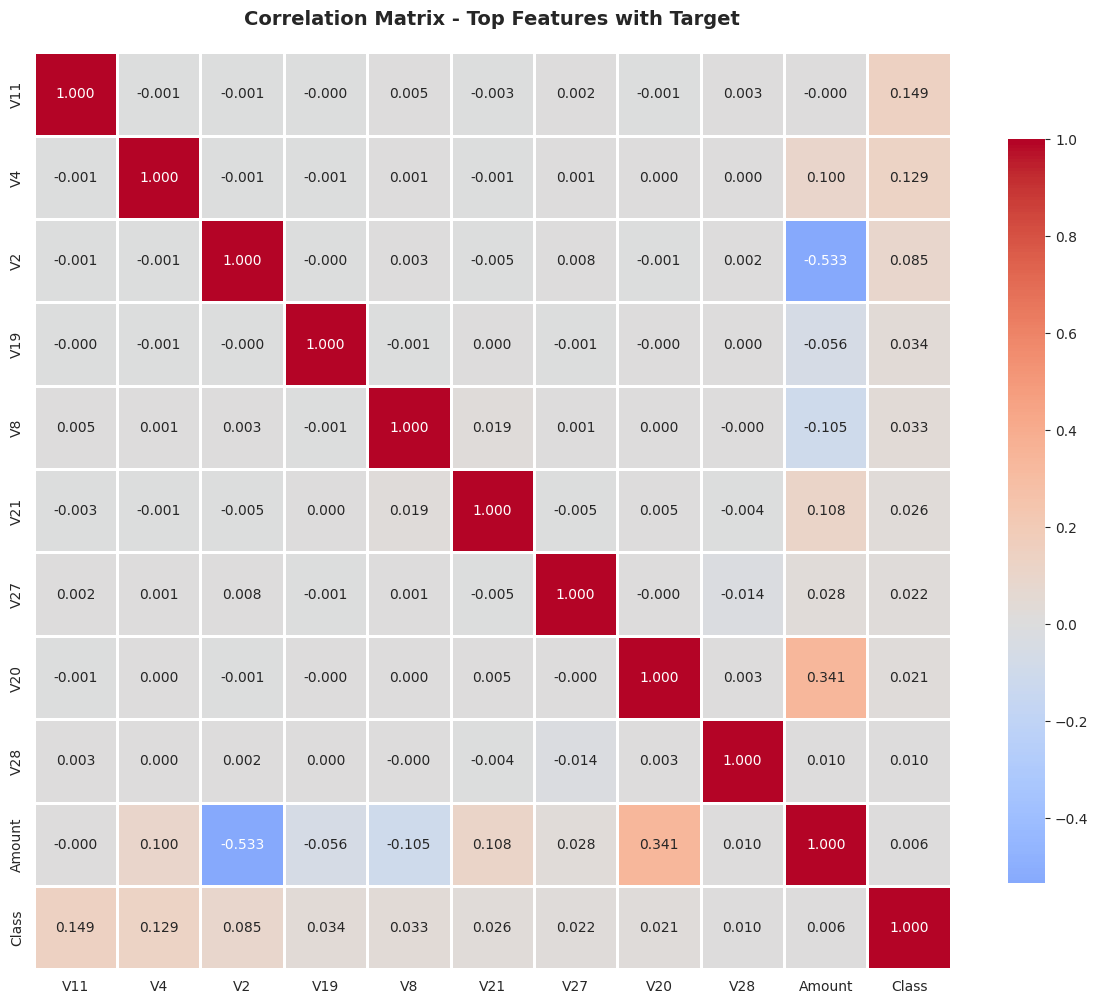


Correlation with Target (Class) - All Features:
Feature    Correlation    
-------------------------
V11                 0.1491
V4                  0.1293
V2                  0.0846
V19                 0.0336
V8                  0.0331
V21                 0.0264
V27                 0.0219
V20                 0.0215
V28                 0.0097
Amount              0.0058
V22                 0.0049
V26                 0.0043
V25                 0.0032
V15                -0.0033
V13                -0.0039
V23                -0.0063
V24                -0.0072
Time               -0.0124
V6                 -0.0439
V5                 -0.0878
V9                 -0.0940
V1                 -0.0945
V18                -0.1053
V7                 -0.1723
V3                 -0.1823
V16                -0.1872
V10                -0.2070
V12                -0.2507
V14                -0.2934
V17                -0.3135


In [47]:
# Correlation analysis
print("=" * 120)
print("CORRELATION ANALYSIS")
print("=" * 120)

# Select key features for correlation
key_features = ['Time', 'Amount'] + v_features + ['Class']
correlation_matrix = df[key_features].corr()

# Plot correlation heatmap (focus on correlations with Class)
class_correlations = correlation_matrix['Class'].sort_values(ascending=False)
top_correlated = class_correlations.head(11).index.tolist()  # Top 10 + Class
top_correlated.remove('Class')

# Create subset correlation matrix
subset_features = top_correlated + ['Class']
subset_corr = df[subset_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top Features with Target', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Class) - All Features:")
print("=" * 120)
print(f"{'Feature':<10} {'Correlation':<15}")
print("-" * 25)
for feature, corr in class_correlations.items():
    if feature != 'Class':
        print(f"{feature:<10} {corr:>15.4f}")


### 5.4 Key Insights and Summary


In [ ]:
print("=" * 120)
print("EDA KEY INSIGHTS SUMMARY")
print("=" * 120)

print("\n1. CLASS DISTRIBUTION:")
print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1 (Normal:Fraud)")
print(f"   - Fraud represents {class_percentages.get(1, 0):.2f}% of all transactions")
print(f"   - Action Required: {'YES - CRITICAL - Use SMOTE/undersampling/class weights' if imbalance_ratio > 100 else 'Yes - Use sampling/class weights' if imbalance_ratio > 10 else 'Moderate - Consider class weights'}")

print("\n2. KEY NUMERICAL FEATURES:")
print(f"   - Time: Mean={df['Time'].mean():.2f}, Median={df['Time'].median():.2f}")
print(f"   - Amount: Mean={df['Amount'].mean():.2f}, Median={df['Amount'].median():.2f}")
print(f"   - Amount Range: Min={df['Amount'].min():.2f}, Max={df['Amount'].max():.2f}")

print("\n3. PCA FEATURES:")
print(f"   - Total PCA Features: {len(v_features)} (V1-V28)")
print(f"   - All features are already transformed (PCA)")
print(f"   - Features are anonymized for privacy protection")

print("\n4. FRAUD PATTERNS:")
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]

print(f"   - Average Amount (Fraud): {fraud_df['Amount'].mean():.2f}")
print(f"   - Average Amount (Normal): {normal_df['Amount'].mean():.2f}")
print(f"   - Median Amount (Fraud): {fraud_df['Amount'].median():.2f}")
print(f"   - Median Amount (Normal): {normal_df['Amount'].median():.2f}")
print(f"   - Average Time (Fraud): {fraud_df['Time'].mean():.2f}")
print(f"   - Average Time (Normal): {normal_df['Time'].mean():.2f}")

# Top correlated features
top_3_features = correlations_with_target.head(4).index.tolist()
top_3_features.remove('Class')
print(f"\n5. TOP FEATURES CORRELATED WITH FRAUD:")
for i, feature in enumerate(top_3_features, 1):
    corr = correlations_with_target[feature]
    print(f"   {i}. {feature}: {corr:.4f}")

print("\n6. RECOMMENDATIONS FOR FEATURE ENGINEERING:")
print("   - Handle EXTREME class imbalance (SMOTE, undersampling, or class weights)")
print("   - PCA features are already transformed - use as-is")
print("   - Consider creating time-based features from Time column")
print("   - Normalize/scale Amount if needed")
print("   - Consider feature selection based on correlation with target")
print("   - Use robust evaluation metrics (Precision, Recall, F1, PR-AUC)")

print("\n✓ EDA Complete! Ready for feature engineering.")
